# **Research Project**
#### _Group 6 - Razvan Simion, Ivaylo Ivanov_

		





#### Project assignment

The goal of this assignment is to design and execute statistical study to investigate if more expensive energy drinks taste better. To achieve that, data will be gather from a sample of ICT students, some of which regularly consume energy drinks and some do not.

#### Collecting the data
Collecting data about taste preferences is extremely subjective. To limit as many of the unknowns as possible, we have purchased as many different drinks as possible from all price ranges. The taste test was conducted with a double blind, where neither the participant nor the test conductor knew what drink was consumed.

The drinks were placed in non-transparent plastic cups, each labeled with a number. The participants were asked to try each of the drinks and give them a rating on the scale from 1 to 10. Non-integer ratings were also an option. The results were then matched with the according drinks and their prices.

#### Analyzing the data
We will be working with the gathered data in this notebook. We will analyze it, trying to spot trends and relationships. We will form a hypothesis and determine whether our findngs are statistically significant to the extent that the original hypothesis can be rejected and ours - suggested.

#### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm;

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Getting the Data

In [2]:
# load data
file_ratings = '/content/rating_price_data.csv'
rating_data = pd.read_csv(file_ratings)

#### List the Data

In [3]:
rating_data

,Price (Euro),Rating
0,1.40,8.0
1,1.40,6.0
2,1.40,8.0
3,1.40,8.0
4,1.40,8.0
...,...,...
136,0.39,1.5
137,0.39,2.0
138,0.39,1.0
139,0.39,5.0


###Our next goal is to visualize the data by making usage of a bar chart

**In order to make a visualisation of the average rating per price from the current data we need to follow some steps:**

Step 1: we create a so-called GroupBy object from the data frame, using the function groupby() with the column 'Price (Euro)' to group by as argument.

In [4]:
prices_grouped = rating_data.groupby('Price (Euro)')

Step 2: get the average mean for each of the prices from the variable 'prices_grouped' created above.

In [5]:
prices_mean = prices_grouped['Rating'].mean()
prices_mean

Price (Euro)
0.30    6.980000
0.39    3.656250
0.45    4.777619
0.50    7.100000
0.58    6.198000
0.66    5.540000
0.72    4.250000
0.75    5.269231
0.79    5.142857
0.95    5.212500
0.99    4.080952
1.40    4.738462
Name: Rating, dtype: float64

Step 3: visualize the data

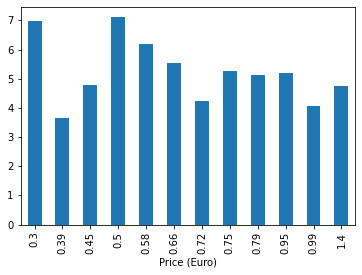

In [6]:
prices_mean.plot(kind='bar');

## Hypothesis testing

The first step in the research is to define a quantative quesion:
> Do more expensive energy drinks receive a higher taste rating from ICT students?

Now that we have defined the question that we want to answer, we need to form a hypothesis. Since we will be looking at mean ratings for drinks at different price points, we are interested in the difference of means.

It can be assumed that drink price and taste rating are not related, so more expensive drinks do not taste better. Alternatively, we could suggest that more expensive drinks do indeed taste better. To formally formulate our hypothesis:

$$𝐻_0:\mu_{expensive}=\mu_{all}$$

$$𝐻_𝑎:\mu_{expensive}>\mu_{all}$$ 

First, we need to define what are expensive drinks. We tested 16 different drinks, some of which had the same price. Arbitrarily, we will choose the 4 most expensive drinks to represent the expensive drinks sample. They have the prices 1.4, 0.99, 0.99 and 0.95.

We will create a dataset to contain the sample of our expensive drinks. This is done using a boolean mask for drinks that cost more than 0.94.

In [7]:
expensive_drinks = rating_data['Price (Euro)'] > 0.94
rating_data[expensive_drinks].describe()

,Price (Euro),Rating
count,42.000000,42.000000
mean,1.109286,4.500000
std,0.197575,2.280565
min,0.950000,1.000000
25%,0.990000,2.625000
50%,0.990000,4.000000
75%,1.400000,6.375000
max,1.400000,9.000000


Now that we have both of our samples, it will be a good idea to see whether we're dealing with a normal distribution of ratings in both datasets.

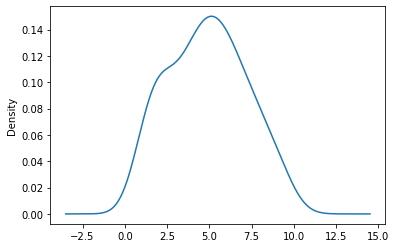

In [8]:
rating_data['Rating'].plot(kind='density');

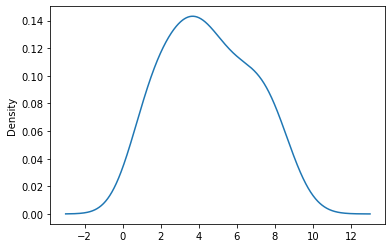

In [9]:
rating_data[expensive_drinks]['Rating'].plot(kind='density');

While we can assure the normality of the data by creating a Q-Q plot and/or conducting an Anderson-Darling normality test, it can be concluded by the shape of the plots above that both distributions are approximately normal.

We can then compare the mean of the ratings of all drinks and the mean of the expensive drink ratings.

In [10]:
# first value in the tuple is the mean rating of all drinks, second is the mean rating of expensive drinks
rating_data['Rating'].describe()['mean'], rating_data[expensive_drinks]['Rating'].describe()['mean']

(4.87531914893617, 4.5)

This result is already giving us a grim outlook on rejecting the null hypothesis. The average rating of expensive drinks in our sample is lower than the average rating of all drinks. While it is highly unlikely that this will give us a meaningful chance at rejecting the null hypothesis, we will still investigate.

First, we need to preprocess the data for work with the statsmodels api.

In [11]:
d_all = sm.stats.DescrStatsW(rating_data['Rating'])
d_expensive = sm.stats.DescrStatsW(rating_data[expensive_drinks]['Rating'])

Afterwards, we use the builtin function to compare the means as described in the HypothesisTesting notebook. It is important that the first argument passed is the sample we observe.

In [12]:
cm = sm.stats.CompareMeans(d_expensive, d_all)

The ttest_ind function returns a tuple with three values. We are interested in the first two values. The first one is the t-test result, and the second one is its p-value.

In [15]:
cm.ttest_ind(alternative='bigger')[:2]

(-0.9302778110242099, 0.17673316778380038)

From the p-value, which is 0.82 (the odds of the achieved result occuring given the null hypothesis were true), we can not reject the null hypothesis. However, this is an expected result, since the expensive drinks mean was lower than the mean for all drinks.

Let us then try the opposite theory:
>More expensive energy drinks taste worse.

$$𝐻_0:\mu_{expensive}=\mu_{all}$$

$$𝐻_𝑎:\mu_{expensive}<\mu_{all}$$ 

We use the already generated piece of code, the only thing that needs to be changed is the function that calculates our p-value. Instead of looking for an alternative hypothesis that is larger than the null, we are looking for a one that is smaller.

In [16]:
cm.ttest_ind(alternative='smaller')[:2]

(-0.9302778110242099, 0.17673316778380038)

Here, the p-value of the result is 0.18, which is still way too high to reject the null hypothesis. Thus, we have not reached a statistically valid conclusion.